## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('optimal temperature.csv')

### Data Overview

In [3]:
df.head()

,indoor_relative_humidity [%],illuminance [lux],indoor_temperature,wind_speed [m/s],occupant_count [number],Atmospheric Pressure,optimal temperature
0,52.0,0.0,26.0,0.19,25,57.1,23.6
1,51.1,0.0,26.1,0.15,28,57.0,23.5
2,50.4,0.0,26.2,0.15,28,57.1,23.4
3,50.5,0.0,26.2,0.15,26,57.1,23.3
4,50.3,0.0,26.2,0.15,25,57.0,23.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   indoor_relative_humidity [%]  8352 non-null   float64
 1   illuminance [lux]             8352 non-null   float64
 2   indoor_temperature            8352 non-null   float64
 3   wind_speed [m/s]              8352 non-null   float64
 4   occupant_count [number]       8352 non-null   int64  
 5   Atmospheric Pressure          8352 non-null   float64
 6   optimal temperature           8352 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 456.9 KB


In [5]:
df.describe()

,indoor_relative_humidity [%],illuminance [lux],indoor_temperature,wind_speed [m/s],occupant_count [number],Atmospheric Pressure,optimal temperature
count,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000,8352.000000
mean,71.216631,52.302944,25.723156,1.268356,35.639368,55.037500,25.571887
std,11.441677,80.991381,2.579283,0.957468,9.035182,3.012764,1.830862
min,45.400000,0.000000,22.000000,0.010000,15.000000,48.500000,20.400000
25%,63.800000,0.000000,24.000000,0.540000,29.000000,52.500000,24.600000
50%,74.400000,0.000000,25.000000,1.020000,35.000000,54.600000,25.500000
75%,80.200000,99.477500,26.500000,1.790000,41.000000,56.400000,26.800000
max,93.000000,2015.550000,31.000000,7.750000,82.000000,78.600000,34.000000


In [6]:
df.corr()

,indoor_relative_humidity [%],illuminance [lux],indoor_temperature,wind_speed [m/s],occupant_count [number],Atmospheric Pressure,optimal temperature
indoor_relative_humidity [%],1.000000,-0.066442,0.095415,0.010090,0.423352,-0.421573,0.499643
illuminance [lux],-0.066442,1.000000,0.181082,-0.187555,-0.122292,0.363778,-0.055560
indoor_temperature,0.095415,0.181082,1.000000,-0.207422,0.176154,-0.019777,0.267503
wind_speed [m/s],0.010090,-0.187555,-0.207422,1.000000,-0.057747,-0.031640,-0.118890
occupant_count [number],0.423352,-0.122292,0.176154,-0.057747,1.000000,-0.329094,0.805462
Atmospheric Pressure,-0.421573,0.363778,-0.019777,-0.031640,-0.329094,1.000000,-0.381748
optimal temperature,0.499643,-0.055560,0.267503,-0.118890,0.805462,-0.381748,1.000000


<Axes: >

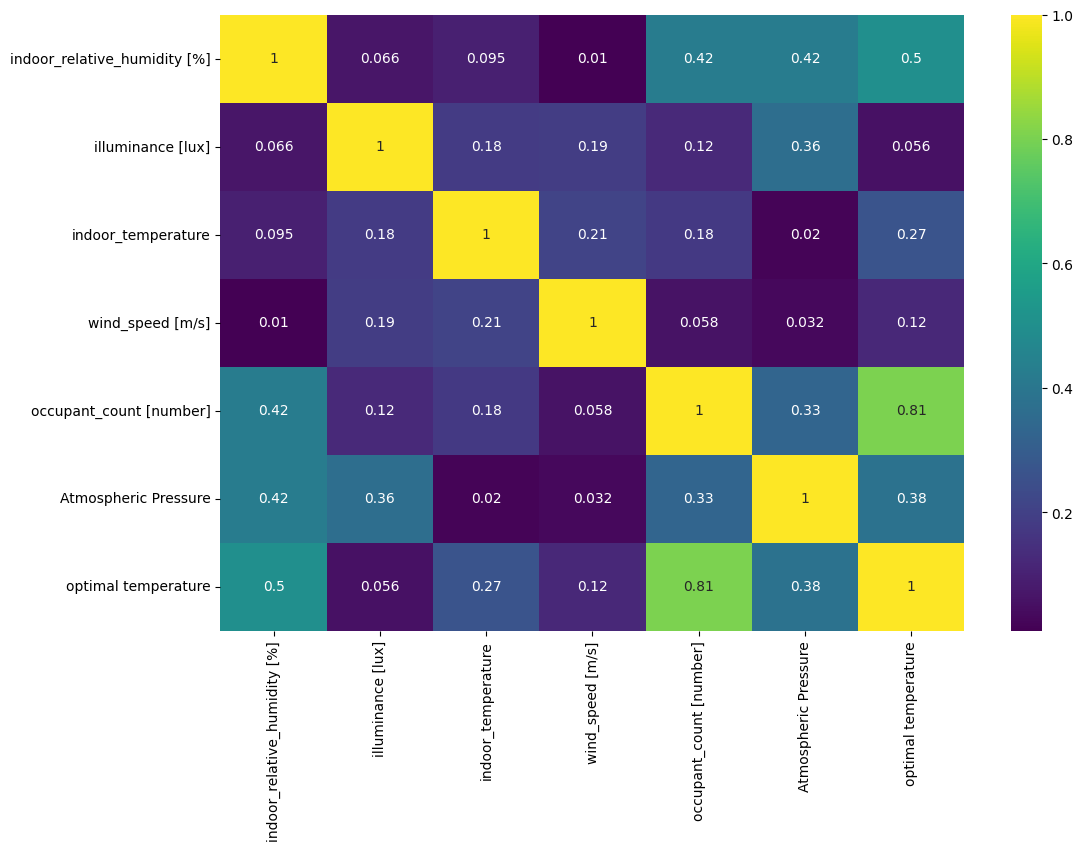

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

Text(0.5, 0, 'optimal temperature')

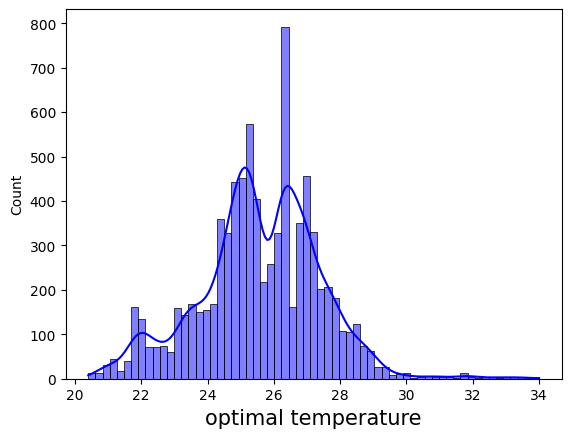

In [16]:

sns.histplot(df['optimal temperature'], color='b', kde=True)
plt.xlabel('optimal temperature',fontsize=15)


#### Add heat index column

In [9]:
def celsius_to_fahrenheit(T):
    return (T * 9/5) + 32

def calculate_heat_index(T, RH):
    T_fahrenheit = celsius_to_fahrenheit(T)
    return (-42.379 + 2.04901523 * T_fahrenheit + 10.14333127 * RH 
            - 0.22475541 * T_fahrenheit * RH - 0.00683783 * T_fahrenheit * T_fahrenheit 
            - 0.05481717 * RH * RH + 0.00122874 * T_fahrenheit * T_fahrenheit * RH 
            + 0.00085282 * T_fahrenheit * RH * RH - 0.00000199 * T_fahrenheit * T_fahrenheit * RH * RH)

In [10]:
df['heat_index'] = calculate_heat_index(df['indoor_temperature'], df['indoor_relative_humidity [%]'])

In [11]:
df.head()

,indoor_relative_humidity [%],illuminance [lux],indoor_temperature,wind_speed [m/s],occupant_count [number],Atmospheric Pressure,optimal temperature,heat_index
0,52.0,0.0,26.0,0.19,25,57.1,23.6,79.945119
1,51.1,0.0,26.1,0.15,28,57.0,23.5,80.030154
2,50.4,0.0,26.2,0.15,28,57.1,23.4,80.125525
3,50.5,0.0,26.2,0.15,26,57.1,23.3,80.132902
4,50.3,0.0,26.2,0.15,25,57.0,23.3,80.118153


<Axes: >

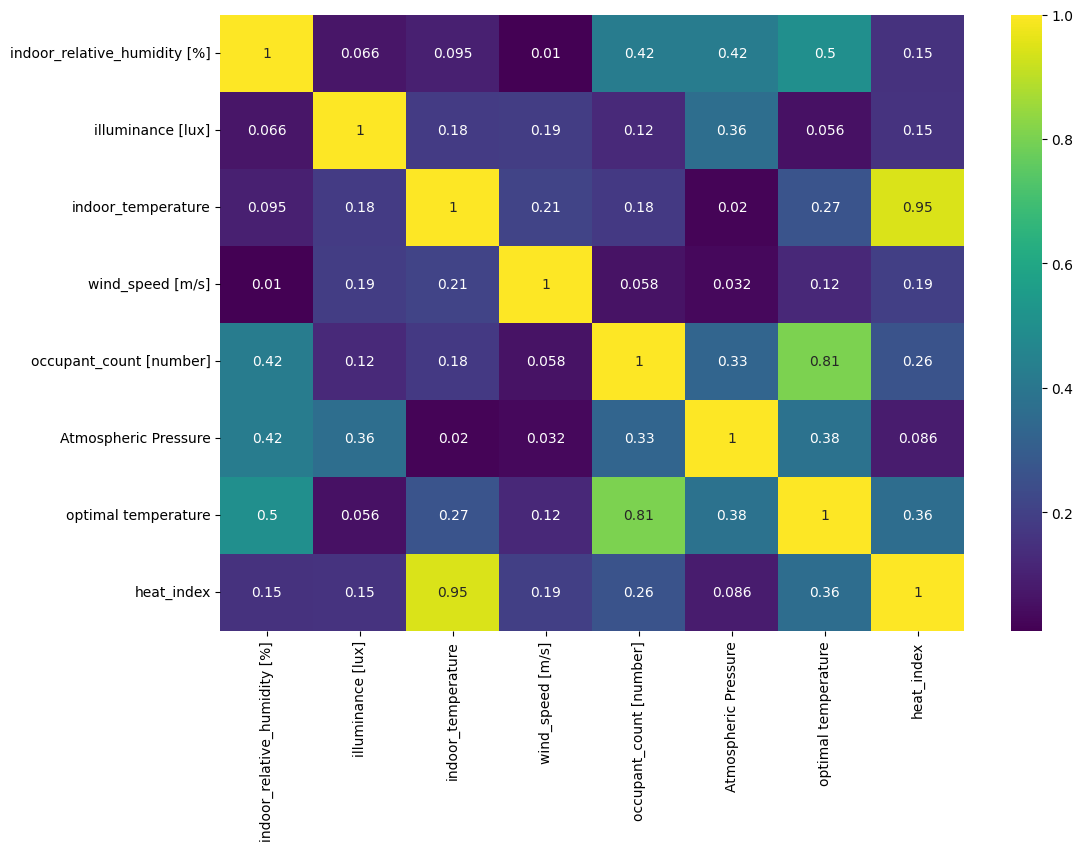

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

In [17]:
Numerical = df.columns

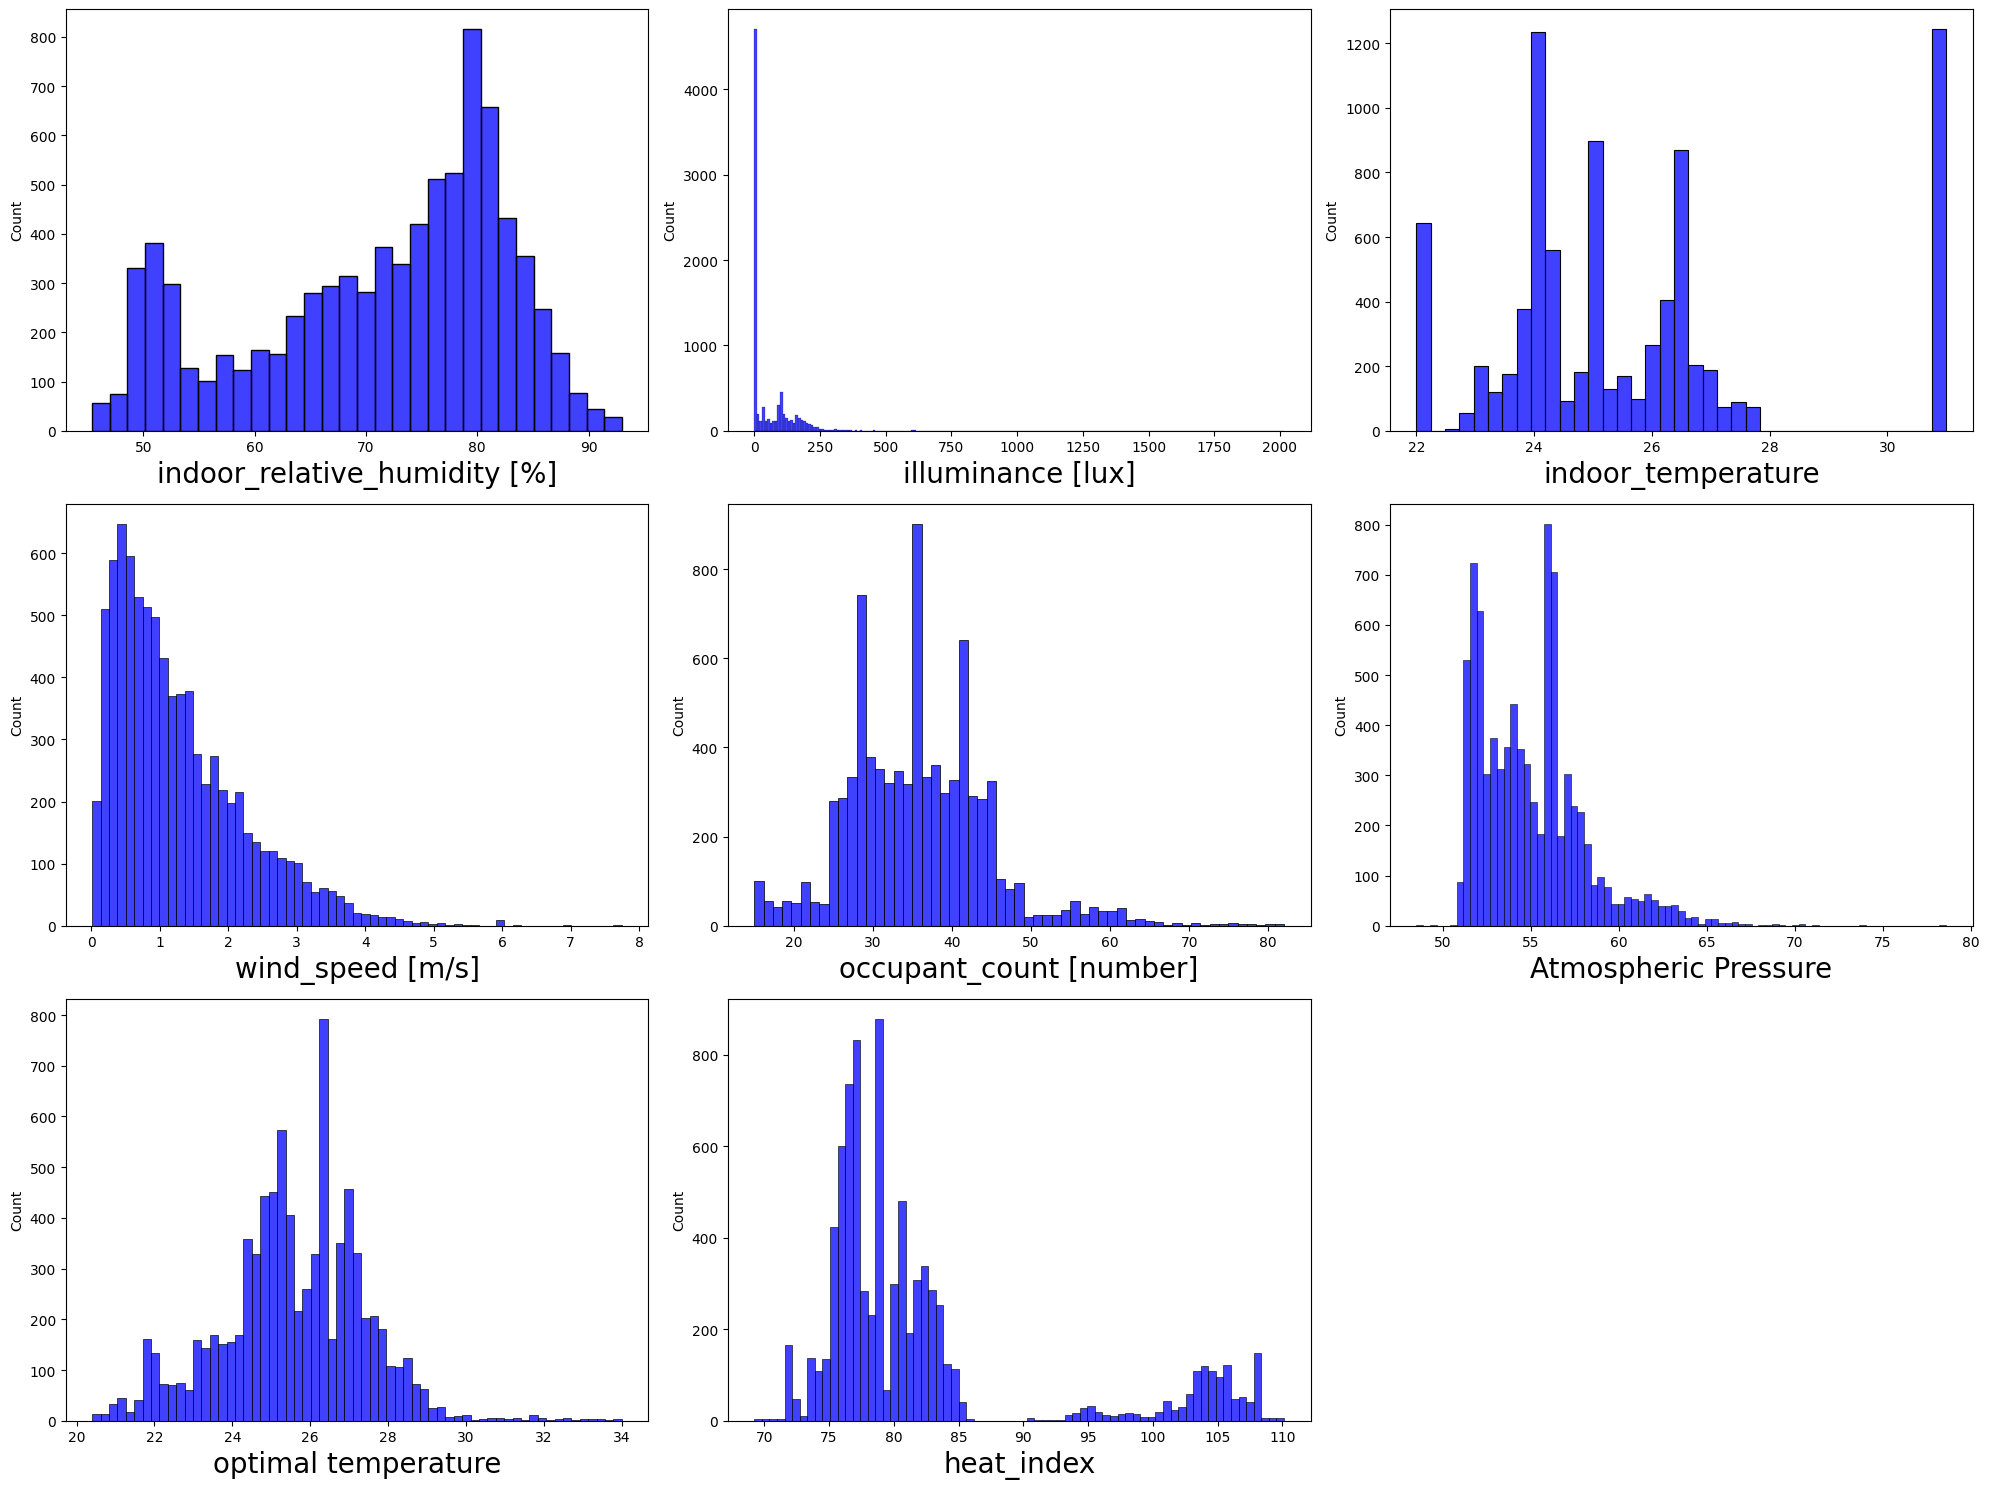

In [18]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [19]:
df.columns

Index(['indoor_relative_humidity [%]', 'illuminance [lux]',
       'indoor_temperature', 'wind_speed [m/s]', 'occupant_count [number]',
       'Atmospheric Pressure', 'optimal temperature', 'heat_index'],
      dtype='object')

In [21]:
columns_to_plot =['indoor_relative_humidity [%]', 'illuminance [lux]',
       'indoor_temperature', 'wind_speed [m/s]', 'occupant_count [number]',
       'Atmospheric Pressure', 'heat_index']

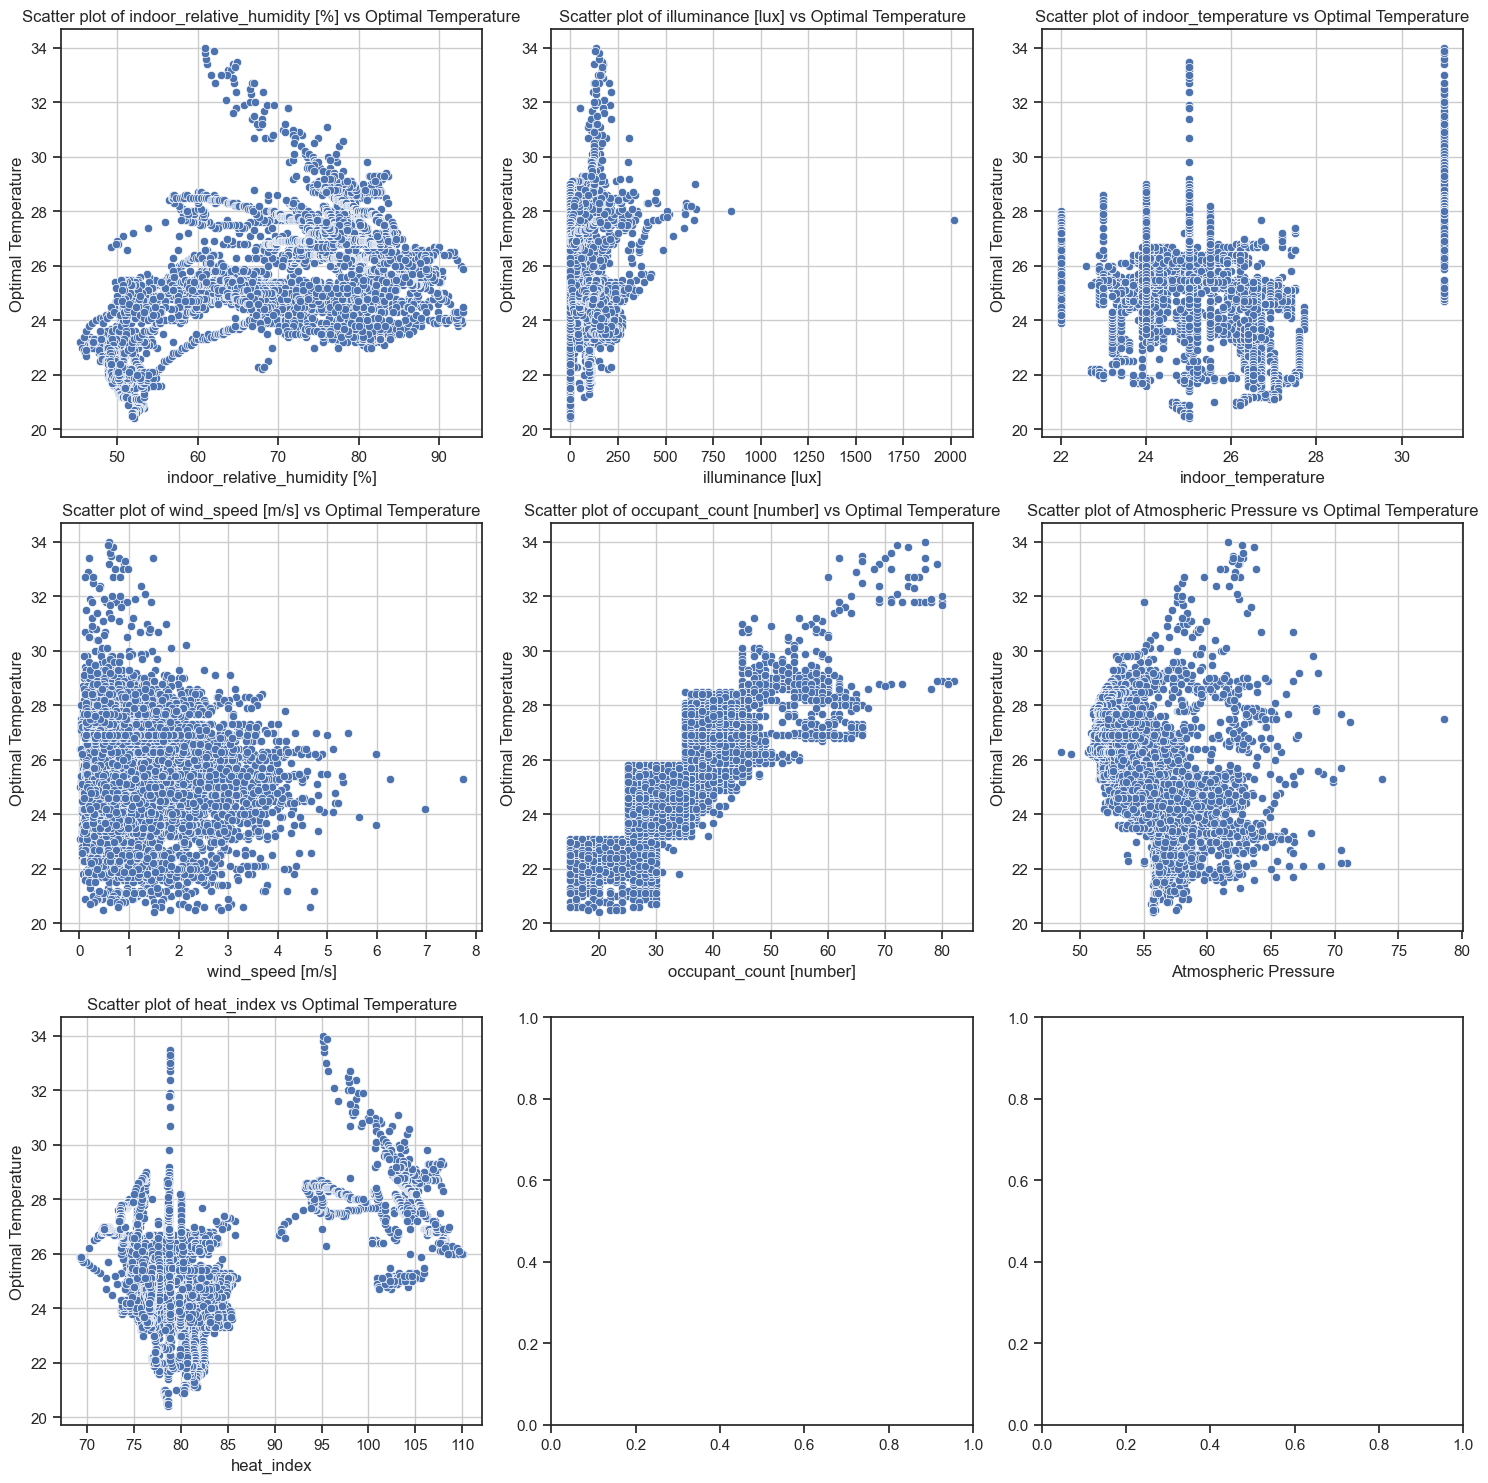

In [24]:
sns.set(style="ticks")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=column, y='optimal temperature', data=df, ax=axes[i], color='b')
    axes[i].set_title(f'Scatter plot of {column} vs Optimal Temperature')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Optimal Temperature')
    axes[i].grid(True)


plt.tight_layout()

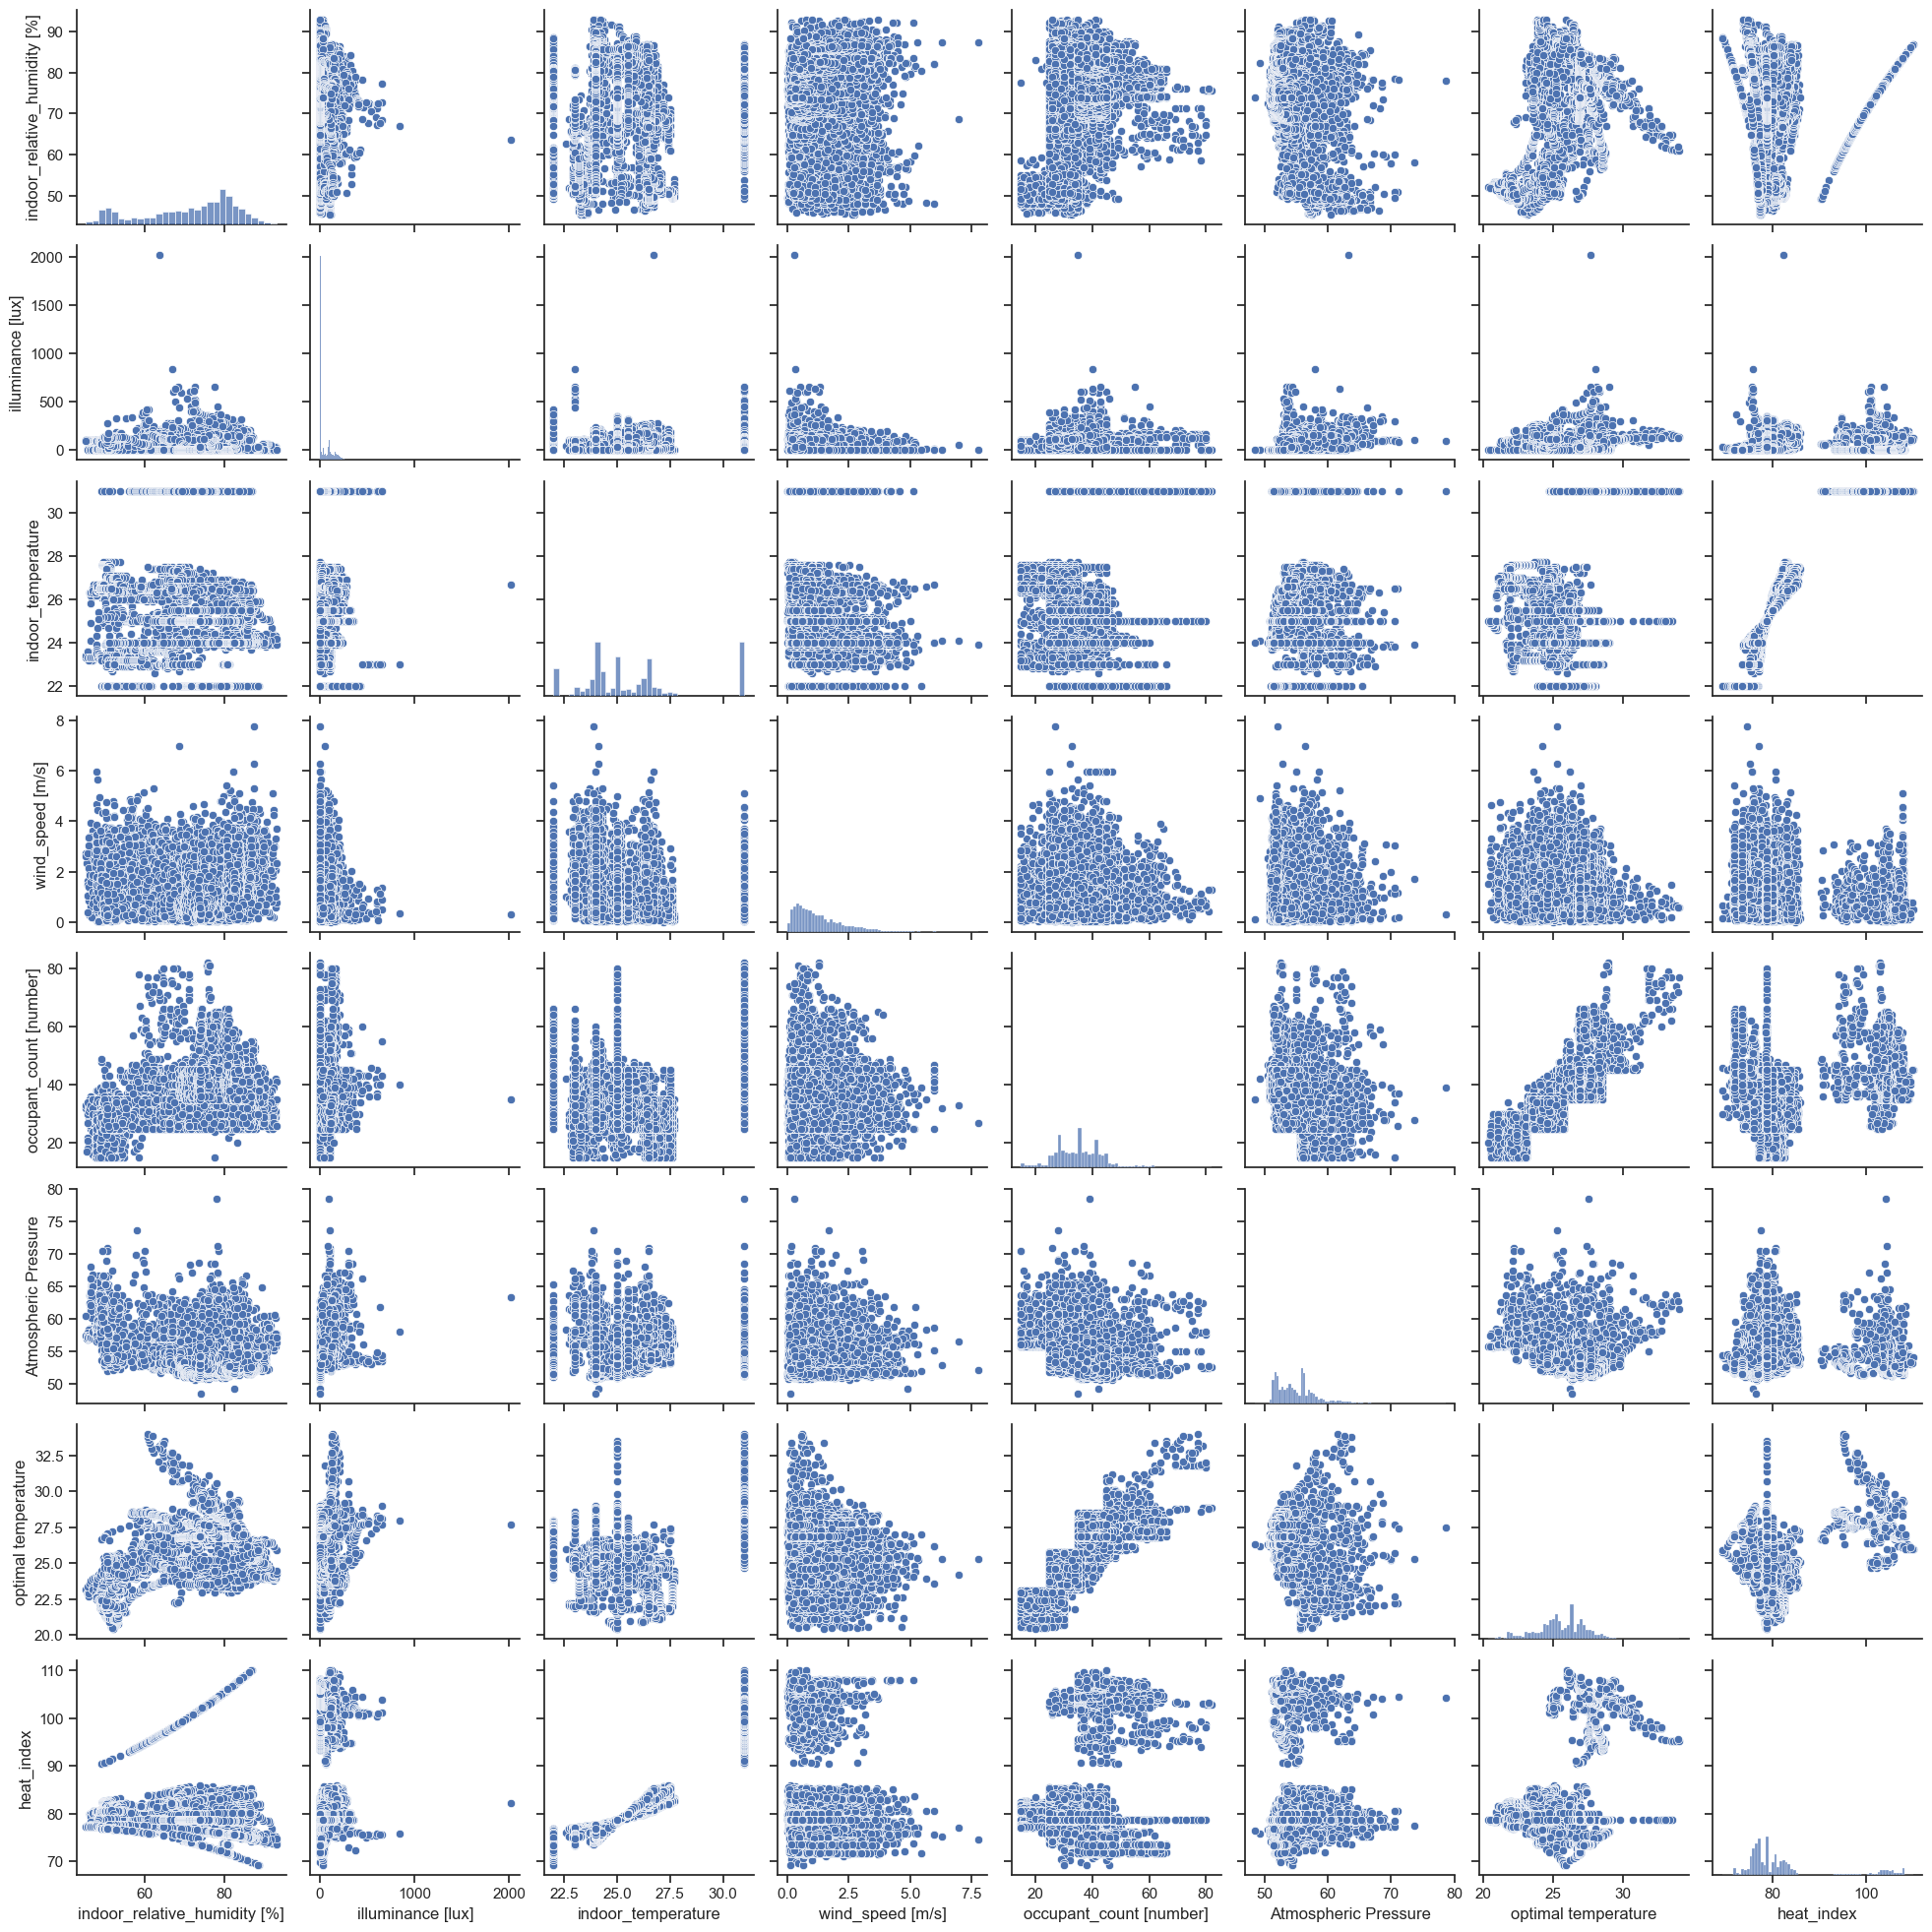

In [25]:
sns.pairplot(df)

## Training and Testing Data

In [27]:
from sklearn.model_selection import train_test_split

In [26]:
y= df["optimal temperature"]
X= df.drop("optimal temperature", axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5846, 7), (2506, 7), (5846,), (2506,))

#### scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Model


In [90]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


### LinearRegression

In [35]:
lm = LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
predictions = lm.predict( X_test)

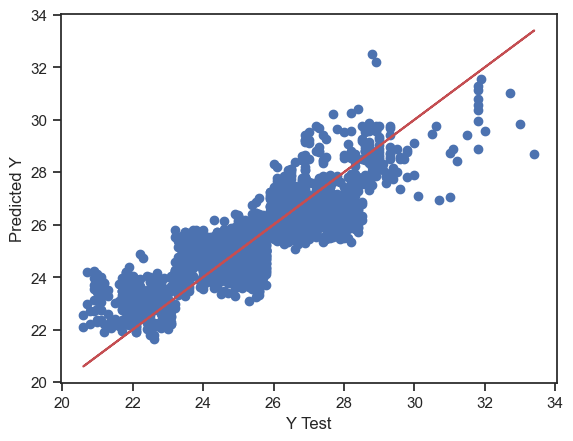

In [126]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [62]:
r2 = r2_score(y_test, predictions)

print("R^2 score:", r2)

R^2 score: 0.7222808817723269


In [59]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.7561924740462095
MSE: 0.943079598848928
RMSE: 0.9711228546630586


<Axes: xlabel='optimal temperature', ylabel='Count'>

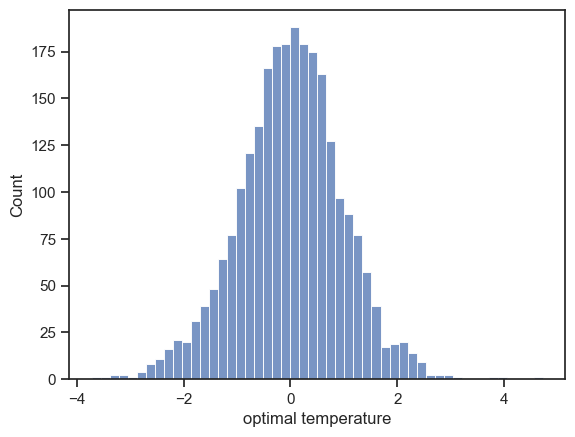

In [57]:
sns.histplot((y_test-predictions),bins=50)

### Random Forest model


In [65]:
rf = RandomForestRegressor()

In [66]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
predictions_rf = rf.predict( X_test)

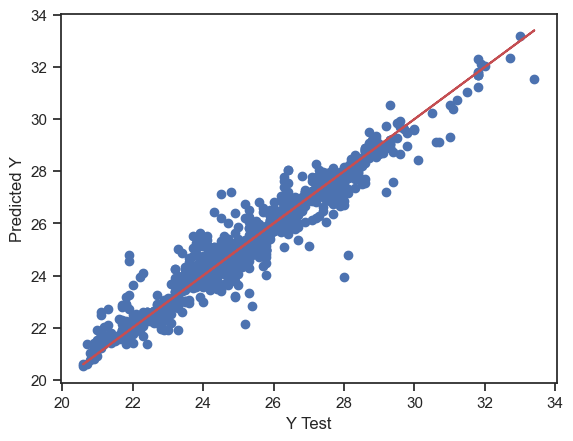

In [125]:
plt.scatter(y_test,predictions_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [70]:
r2 = r2_score(y_test, predictions_rf)

print("R^2 score:", r2)

R^2 score: 0.9524475413501907


In [72]:
print('MAE:', mean_absolute_error(y_test, predictions_rf))
print('MSE:', mean_squared_error(y_test, predictions_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_rf)))

MAE: 0.22291620111731913
MSE: 0.1614788132482041
RMSE: 0.4018442649188913


<Axes: xlabel='optimal temperature', ylabel='Count'>

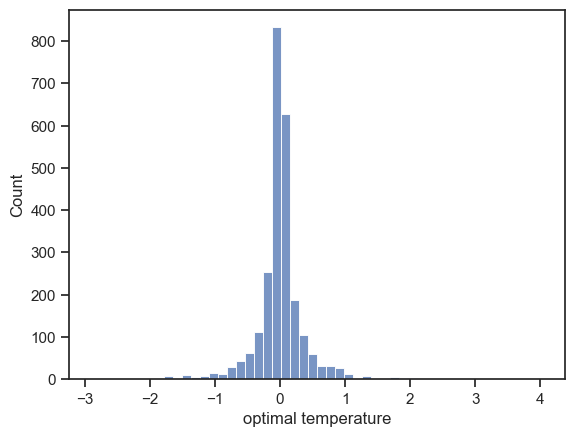

In [73]:
sns.histplot((y_test-predictions_rf),bins=50)

### Ridge Regression

In [74]:
rg = Ridge()

In [75]:
rg.fit(X_train, y_train)

Ridge()

In [76]:
predictions_rg = rg.predict( X_test)

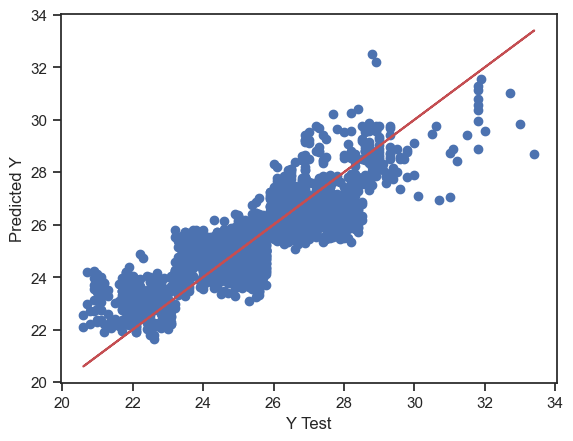

In [124]:
plt.scatter(y_test,predictions_rg)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [79]:
r2 = r2_score(y_test, predictions_rg)

print("R^2 score:", r2)

R^2 score: 0.7222806803024814


In [82]:
print('MAE:', mean_absolute_error(y_test, predictions_rg))
print('MSE:', mean_squared_error(y_test, predictions_rg))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_rg)))

MAE: 0.7561940053998664
MSE: 0.943080283000967
RMSE: 0.971123206910929


<Axes: xlabel='optimal temperature', ylabel='Count'>

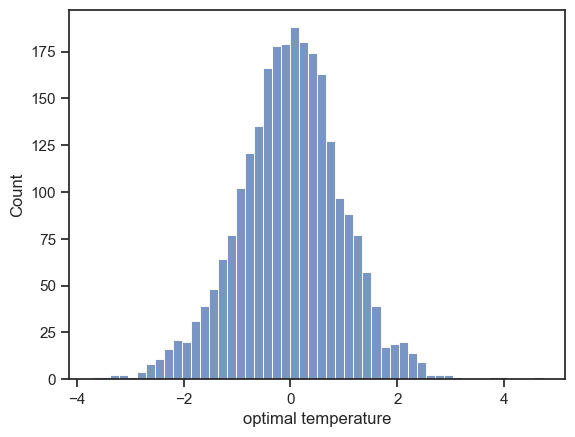

In [81]:
sns.histplot((y_test-predictions_rg),bins=50)

### Lasso Regression

In [83]:
ls = Lasso()

In [84]:
ls.fit(X_train, y_train)

Lasso()

In [85]:
predictions_ls = ls.predict(X_test)

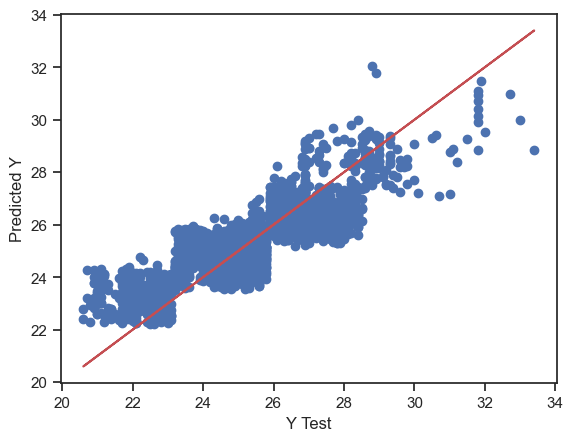

In [123]:
plt.scatter(y_test,predictions_ls)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [87]:
r2 = r2_score(y_test, predictions_ls)

print("R^2 score:", r2)

R^2 score: 0.7019984006430264


In [88]:
print('MAE:', mean_absolute_error(y_test, predictions_ls))
print('MSE:', mean_squared_error(y_test, predictions_ls))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_ls)))

MAE: 0.7897755257195948
MSE: 1.0119549225542281
RMSE: 1.00595970225165


<Axes: xlabel='optimal temperature', ylabel='Count'>

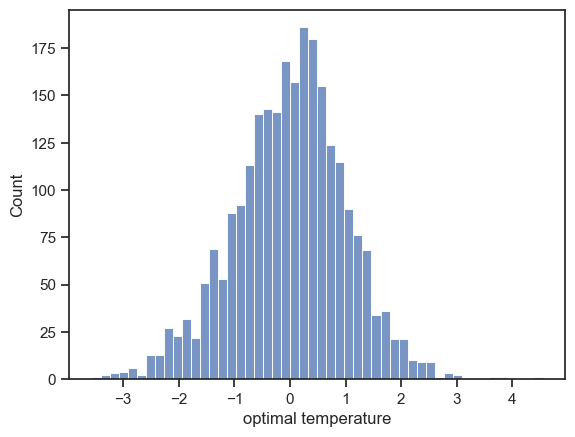

In [89]:
sns.histplot((y_test-predictions_ls),bins=50)

### Decision Tree

In [91]:
dt = DecisionTreeRegressor()

In [95]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
predictions_dt = dt.predict(X_test)

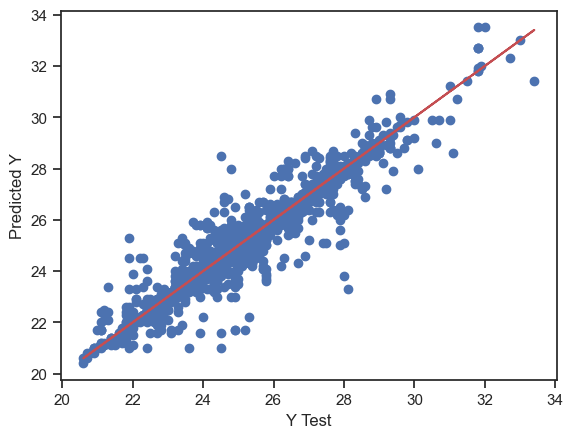

In [122]:
plt.scatter(y_test,predictions_dt)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Evaluating the Model

In [99]:
r2 = r2_score(y_test, predictions_dt)

print("R^2 score:", r2)


R^2 score: 0.9143196309319533


In [100]:
print('MAE:', mean_absolute_error(y_test, predictions_dt))
print('MSE:', mean_squared_error(y_test, predictions_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_dt)))

MAE: 0.2651636073423788
MSE: 0.2909537110933759
RMSE: 0.5394012524024911


<Axes: xlabel='optimal temperature', ylabel='Count'>

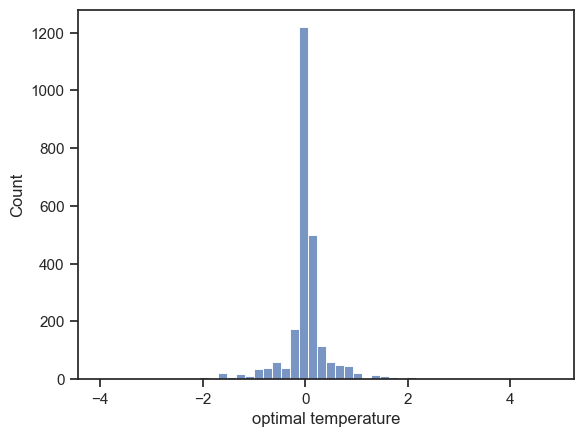

In [101]:
sns.histplot((y_test-predictions_dt),bins=50)

## Personal Customization Hypertune Parameters

### Hypertune Parameters tuning for Random Forest

In [102]:
model = RandomForestRegressor()

In [103]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [104]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [105]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [106]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [107]:
best_model = grid_search.best_estimator_

In [115]:
predictions_best_model = best_model.predict(X_test)

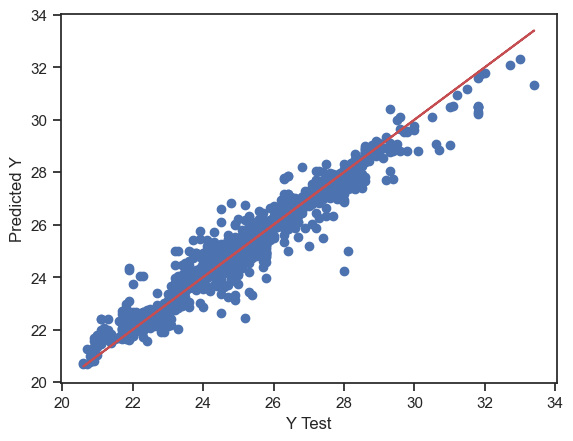

In [121]:
plt.scatter(y_test,predictions_best_model)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.plot(y_test,y_test,'r')

### Best model evaluation  

In [117]:
r2 = r2_score(y_test, predictions_best_model)

print("R^2 score:", r2)

R^2 score: 0.950534947329079


In [118]:
print('MAE:', mean_absolute_error(y_test, predictions_best_model))
print('MSE:', mean_squared_error(y_test, predictions_best_model))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_best_model)))

MAE: 0.24608179889593795
MSE: 0.16797360703014408
RMSE: 0.4098458332472639


<Axes: xlabel='optimal temperature', ylabel='Count'>

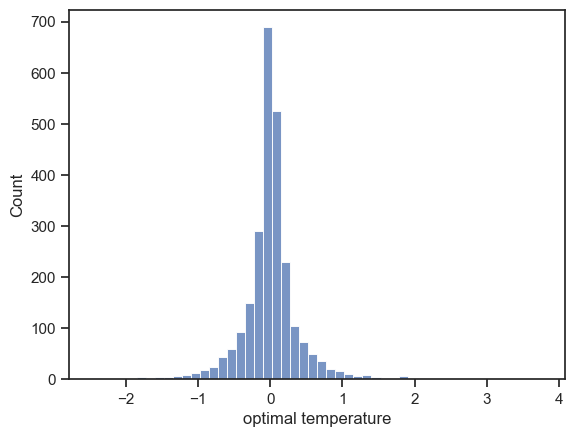

In [119]:
sns.histplot((y_test-predictions_best_model),bins=50)

In [120]:
import pickle

with open('optimal_temperature.pkl', 'wb') as f:
    pickle.dump(best_model, f)